In [1]:
#Importation des librairies
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kilia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
data_path = "../data/txt/"

In [9]:
#choisir une décénie
DECADE = '1880'

In [10]:
#créer une liste de textes de  tous les fichiers de la décénie 1860
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [11]:
# Exemple de fichiers
files[:5]

['KB_JB838_1887-12-22_01-00001.txt',
 'KB_JB838_1887-12-22_01-00002.txt',
 'KB_JB838_1887-12-22_01-00003.txt',
 'KB_JB838_1887-12-22_01-00004.txt',
 'KB_JB838_1887-12-22_01-00005.txt']

In [12]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [13]:
# Exemple de textes
texts[0][:400]

'ræge quotidien J00 EXEMPLAIRES distribués gratuitement ■ k . ‘ dans ilàgg;lomération bruxelloise et.en province. ï personnes habitant aux étages fenile journal contre 60 c“« par mois. fSpir est expédié en proyinôe contre t*»"par mois, payables par trimestre. annonces, faits divers et réclames sjont reçu frie d’Isabelle ; à l’AGENCE ROSSFJl. 44. -v , et do l’Enseignement, à BraxelL annonces remises'

## Vectoriser les documents à l'aide de TF-IDF

In [15]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [16]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [17]:
# Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`
tfidf_vectors = vectorizer.fit_transform(texts)

In [18]:
# Détail de la matrice
tfidf_vectors.shape

(236, 2751)

In [19]:
# Imprimer le vecteur tf-IDF du premier document
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

commis       0.173980
capitaine    0.147061
uno          0.147036
décembre     0.141962
langues      0.138614
               ...   
engager      0.000000
enlevé       0.000000
enquête      0.000000
ensemble     0.000000
juillet      0.000000
Length: 2751, dtype: float64

In [20]:
# Observer les distances entre quelques vecteurs de nos documents
tfidf_array = tfidf_vectors.toarray()

In [21]:
# Vecteur du document 0
tfidf_array[0]

array([0.        , 0.        , 0.02657873, ..., 0.        , 0.03803381,
       0.03604103])

In [22]:
# Vecteur du document 1
tfidf_array[1]

array([0.        , 0.        , 0.02161775, ..., 0.        , 0.03093471,
       0.        ])

In [24]:
# Vecteur du document 2
tfidf_array[2]

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.01069914])

In [25]:
# Vecteur du document 3
tfidf_array[3]

array([0.       , 0.0594173, 0.       , ..., 0.       , 0.       ,
       0.       ])

In [23]:
cosine(tfidf_array[0], tfidf_array[1])

0.7179300466038534

In [26]:
cosine(tfidf_array[2], tfidf_array[3])

0.9511133965333436

## Appliquer Un algorithme de Clustering sur les vecteurs TF-IDF des documents

In [27]:
#Définir un nombre de Clusterings 
N_CLUSTERS = 5

In [28]:
# Instancier le modèle K-Means et ses arguments
km_model = KMeans(n_clusters=N_CLUSTERS)

In [30]:
# Appliquer le clustering à l'aide de la fonction `fit_predict`

In [31]:
clusters = km_model.fit_predict(tfidf_vectors)

In [32]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [33]:
pprint(dict(clustering))

{0: ['KB_JB838_1887-12-22_01-00003.txt',
     'KB_JB838_1887-12-22_01-00006.txt',
     'KB_JB838_1887-12-25_01-00003.txt',
     'KB_JB838_1887-12-28_01-00003.txt',
     'KB_JB838_1887-12-29_01-00003.txt',
     'KB_JB838_1887-12-30_01-00003.txt',
     'KB_JB838_1887-12-31_01-00003.txt',
     'KB_JB838_1888-01-02_01-00003.txt',
     'KB_JB838_1888-03-22_01-00003.txt',
     'KB_JB838_1888-05-18_01-00003.txt',
     'KB_JB838_1888-06-21_01-00003.txt',
     'KB_JB838_1888-06-30_01-00003.txt',
     'KB_JB838_1888-07-28_01-00003.txt',
     'KB_JB838_1888-09-08_01-00003.txt',
     'KB_JB838_1888-10-18_01-00003.txt',
     'KB_JB838_1888-11-14_01-00003.txt',
     'KB_JB838_1888-11-21_01-00003.txt',
     'KB_JB838_1888-11-29_01-00003.txt',
     'KB_JB838_1889-02-07_01-00003.txt',
     'KB_JB838_1889-03-20_01-00003.txt',
     'KB_JB838_1889-06-07_01-00003.txt',
     'KB_JB838_1889-07-19_01-00003.txt',
     'KB_JB838_1889-07-24_01-00003.txt',
     'KB_JB838_1889-07-31_01-00003.txt',
     'KB_JB838_1

## Visualiser les Clusters

In [34]:
# Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [35]:
reduced_vectors[:10]

array([[-0.23650836, -0.16865119],
       [-0.23385747, -0.19084202],
       [-0.2512002 ,  0.81912455],
       [ 0.23558554,  0.00096393],
       [ 0.15716509, -0.00993538],
       [-0.26228059,  0.81144278],
       [-0.22187818, -0.1721427 ],
       [-0.07704543, -0.00730793],
       [-0.23833334, -0.16995424],
       [-0.23331123, -0.15747133]])

## Générer un plot

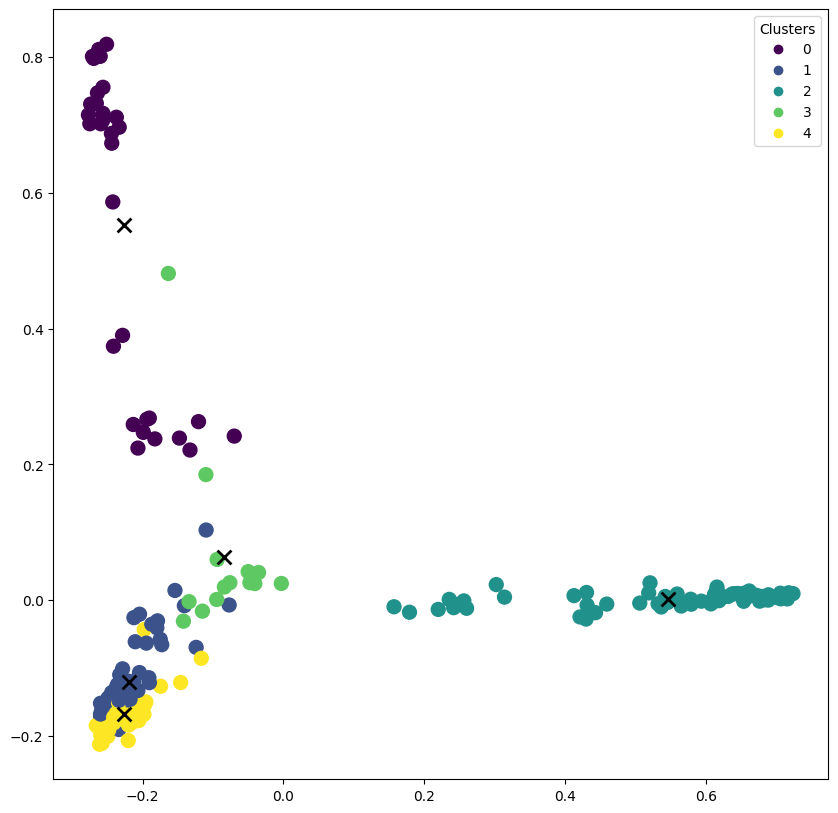

In [36]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")